# Biolerplate

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.vigenere import *
from cipher.playfair import *
from cipher.column_transposition import *
from support.text_prettify import *
from support.plot_frequency_histogram import *

In [28]:
ca = open('8a.ciphertext').read()
cb = open('8b.ciphertext').read()
sca = sanitise(ca)
scb = sanitise(cb)
pca = letters(ca)
pcb = letters(cb)

In [5]:
history_words = [w.strip() for w in open('history-words.txt')]
len(history_words)

8197

In [7]:
history_transpositions = collections.defaultdict(list)
for word in history_words:
    history_transpositions[transpositions_of(word)] += [word]

# Part A

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


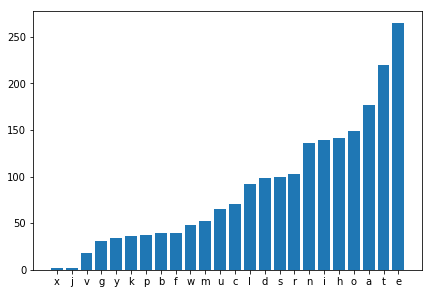

In [6]:
fc = collections.Counter(sca)
plot_frequency_histogram(fc, sort_key=fc.get)

In [12]:
(trans_a, fillcol_a, emptycol_a), score = column_transposition_break_mp(sca, translist=history_transpositions, fitness=Ptrigrams)
(trans_a, fillcol_a, emptycol_a), score

(((0, 2, 7, 5, 6, 3, 1, 4), False, True), -8088.637383066303)

In [14]:
(trans_a, fillcol_a, emptycol_a), score = column_transposition_break_mp(sca, fitness=Ptrigrams)
(trans_a, fillcol_a, emptycol_a), score

(((0, 2, 3, 6, 7, 4, 1, 5), False, True), -7787.854522433465)

In [15]:
column_transposition_decipher(pca, trans_a, fillcolumnwise=fillcol_a, emptycolumnwise=emptycol_a)

'kedIchecdtoarounIwaseeifgwasbeinbuttchedomwtheroiniasdefmpttelyecouyandIearldnthinganythdesoutsikedoIducoindowntthespectsidunderetaeofthetobleThighpwashishlypolhagedwitulsracefothlopetthieedgengackeniprositaptheachedecocentrherlumnToviewasnmecsiblemtohanissttsuggewashatitinganythhanmoretearitappeagedtoborkrandwatttabletrehecenandofagrolrcontrushoomIpedaedpoktenndlisanoedforechthermbutanismwastherengmnothiicaechanIcolthatndTuldfickehethifthningondtetopakofhebullumthecollondidaforwroomlysafairntiubstahanalmecougismthuckhandtnthedupiwheefoldtoprethedthjoinemntecoluasaherewmetsmalltebalplagamearinmarakersartkMyheedtskipprtohedooadotheShivewArchedacarriarpsimilnsclateiwitribedradhthetofJemarknntohnTaksmhelocomaithwhturnufacsecedthesysuritythetemonnceentrakedItlooehalikehmaddalsotabethisasnleHewrniotafuaketuremherrandtdonecoulnerlybeoheheasonethadmadItmisoneparustbeocktofalnismechasthmHewaingeleadakesafemctorinViondrianLifBonandadflackheneeltthhimedforldatobuinthsafeitofehearadotheShivewArc

In [33]:
len(pca) / 8

262.0

In [35]:
first_row = every_nth(pca, 262)[0]
first_row

'kdIecceh'

In [68]:
target_pt = 'Ichecked'
# tta = (2, 1, 0, 3, 4, 5, 6, 7)
tta = (5, 7, 0, 3, 4, 1, 6, 2)
tta = (5, 7, 0, 6, 4, 1, 3, 2)
tta = (5, 7, 0, 3, 1, 4, 6, 2)
tta = (5, 7, 0, 6, 1, 4, 3, 2)

column_transposition_encipher(target_pt, tta), first_row

('kdIecceh', 'kdIecceh')

In [49]:
sample_ta = [(5, 7, 0, 3, 4, 1, 6, 2), (5, 7, 0, 6, 4, 1, 3, 2), (5, 7, 0, 3, 1, 4, 6, 2), (5, 7, 0, 6, 1, 4, 3, 2)]

In [50]:
(trans_a, fillcol_a, emptycol_a), score = column_transposition_break_mp(sca, translist=sample_ta, fitness=Ptrigrams)
(trans_a, fillcol_a, emptycol_a), score

(((5, 7, 0, 3, 4, 1, 6, 2), False, True), -7097.955599556401)

In [52]:
raw_pta = column_transposition_decipher(pca, trans_a, fillcolumnwise=fillcol_a, emptycolumnwise=emptycol_a)
raw_pta

'IcheckedaroundtoseeifIwasbeingwatchedbuttheroomwasdefinitelyemptyandIcouldnthearanythingoutsidesoIduckeddowntoinspecttheundersideofthetableThetopwashighlypolishedwithagracefulslopetotheedgethickeningasitapproachedthecentrecolumnTherewasnovisiblemechanismtosuggestthatitwasanythingmorethanitappearedtobeagrandworktableatthecentreofagrandcontrolroomIpushedpokedandlistenedforanothermechanismbuttherewasnothingmechanicalthatIcouldfindThethickeningofthetopandthebulkofthecolumndidallowroomforafairlysubstantialmechanismthoughandtuckedupinthefoldwherethetopjoinedthecolumntherewasasmallmetalplatebearingamakersmarkMyheartskippedthedoortotheShadowArchivecarriedasimilarplateinscribedwiththetrademarkofJohnTannthelocksmithwhomanufacturedthesecuritysystemontheentranceItlookedlikehehadalsomadethistableHewasnotafurnituremakerandtherecouldonlybeonereasonhehadmadethisoneItmustbepartofalockmechanismHewastheleadingsafemakerinVictorianLondonandifBlackhadfelttheneedforhimtobuildasafeintheheartoftheShadowArchiv

In [53]:
print(lcat(tpack(segment(raw_pta))))

I checked around to see if I was being watched but the room was definitely empty and I couldnt hear
anything outside so I ducked down to inspect the underside of the table The top was highly polished
with a graceful slope to the edge thickening as it approached the centre column There was no visible
mechanism to suggest that it was anything more than it appeared to be a grand work table at the
centre of a grand control room I pushed poked and listened for another mechanism but there was
nothing mechanical that I could find The thickening of the top and the bulk of the column did allow
room for a fairly substantial mechanism though and tucked up in the fold where the top joined the
column there was a small metal plate bearing a makers mark My heart skipped the door to the Shadow
Archive carried a similar plate inscribed with the trademark of John Tann the locksmith who
manufactured the security system on the entrance It looked like he had also made this table He was
not a furniture make

In [54]:
transpositions[trans_a]

[]

In [55]:
history_transpositions[trans_a]

[]

In [70]:
[transpositions[tr] for tr in sample_ta]

[[], [], ['enumerated'], []]

In [56]:
open('8a.plaintext', 'w').write(lcat(tpack(segment(raw_pta))))

2581

In [77]:
many_words = [w.strip() for w in open('../many_word_lists/combined.txt')]
len(many_words)

279585

In [78]:
many_transpositions = collections.defaultdict(list)
for word in many_words:
    many_transpositions[transpositions_of(word)] += [word]

In [79]:
many_transpositions[trans_a]

['gothicise', 'gothicises']

# Part B

In [61]:
key_b, score = vigenere_frequency_break(scb)
key_b

'shadow'

In [62]:
vigenere_decipher(scb, key_b)

'elliothasdonehimselfnofavoursinarguingthepragmaticlineattheconstantinopleconferencedisraelicaughtthemoodwithhispamphletandthepeopledonotseemtoagreethatbulgarianlivescountforlessinthecalculusofinternationalaffairsithinksalisburyplanstomovehimonperhapsbacktoviennahewassuccessfulthereitismostunusualtohaveannoyedbothsalisburyandgladstonebutihavesomesympathywithhisviewstheterribleeventsthathaveprecipitatedthiscrisiscannotbeundoneandthereareotherconsiderationsrussianaggressionmuststillbeimpededifwearetoretainourinfluenceintheregionmyagentstellmethattherussianemperormetwiththeaustriansatbudapestatthestartoftheyeartodiscusstheirintentionsintheeventofwaranditisrumouredthattheyplantorestructurethebalkansinanefforttocontroltheslavicmovesforaunifiedstateitismyownviewthattheslavsmaybeamostusefulallyinblockingtheexpansionistmovementinrussiaandihaveadvisedthegovernmenttoinvitetheaustrianstojoinusinmarchtoseeifwecaneffectadiplomaticsolutiontountanglethisgordianknotperhapswecanfindsomethingmoreattract

In [63]:
print(lcat(tpack(segment(vigenere_decipher(scb, key_b)))))

elliot has done himself no favours in arguing the pragmatic line at the constantinople conference
disraeli caught the mood with his pamphlet and the people do not seem to agree that bulgarian lives
count for less in the calculus of international affairs i think salisbury plans to move him on
perhaps back to vienna he was successful there it is most unusual to have annoyed both salisbury and
gladstone but i have some sympathy with his views the terrible events that have precipitated this
crisis can not be undone and there are other considerations russian aggression must still be impeded
if we are to retain our influence in the region my agents tell me that the russian emperor met with
the austrians at budapest at the start of the year to discuss their intentions in the event of war
and it is rumoured that they plan to restructure the balkans in an effort to control the slavic
moves for a unified state it is my own view that the slavs maybe a most useful ally in blocking the
expansionist

In [64]:
open('8b.plaintext', 'w').write(lcat(tpack(segment(vigenere_decipher(scb, key_b)))))

2419